In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import matplotlib.image as mpimg
import random
from sklearn import preprocessing
import tensorflow.keras as keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 50
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

In [ ]:
#data augmentation
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        directory = '/content/drive/MyDrive/Potato/Train',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="rgb")
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Potato/Valid',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb")
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Potato/Test/',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode = "rgb"
)

Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 64)        0

In [ ]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [10]:
#training
history = model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.n // train_generator.batch_size,
        epochs = EPOCHS,
        validation_data = validation_generator,
        validation_steps = validation_generator.n // validation_generator.batch_size
        )

<ipython-input-10-d97207c21333>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
56/56 [==============================] - 489s 9s/step - loss: 0.8703 - accuracy: 0.5249 - val_loss: 0.4472 - val_accuracy: 0.7812
Epoch 2/50
56/56 [==============================] - 147s 3s/step - loss: 0.4363 - accuracy: 0.8190 - val_loss: 0.3864 - val_accuracy: 0.8542
Epoch 3/50
56/56 [==============================] - 152s 3s/step - loss: 0.3565 - accuracy: 0.8597 - val_loss: 0.4471 - val_accuracy: 0.7986
Epoch 4/50
56/56 [==============================] - 150s 3s/step - loss: 0.3260 - accuracy: 0.8665 - val_loss: 0.3364 - val_accuracy: 0.8507
Epoch 5/50
56/56 [==============================] - 141s 3s/step - loss: 0.2906 - accuracy: 0.8846 - val_loss: 0.3424 - val_accuracy: 0.8611
Epoch 6/50
56/56 [==============================] - 140s 2s/step - loss: 0.2692 - accuracy: 0.8971 - val_loss: 0.3660 - val_accuracy: 0.8472
Epoch 7/50
56/56 [==============================] - 140s 2s/step - loss: 0.2413 - accuracy: 0.9061 - val_loss: 0.3808 - val_accuracy: 0.8472
Epoch 8/50
56

In [11]:
score= model.evaluate(test_generator)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

19/19 [==============================] - 146s 8s/step - loss: 0.0719 - accuracy: 0.9867
Test loss: 0.0719410702586174
Test accuracy: 0.9866666793823242


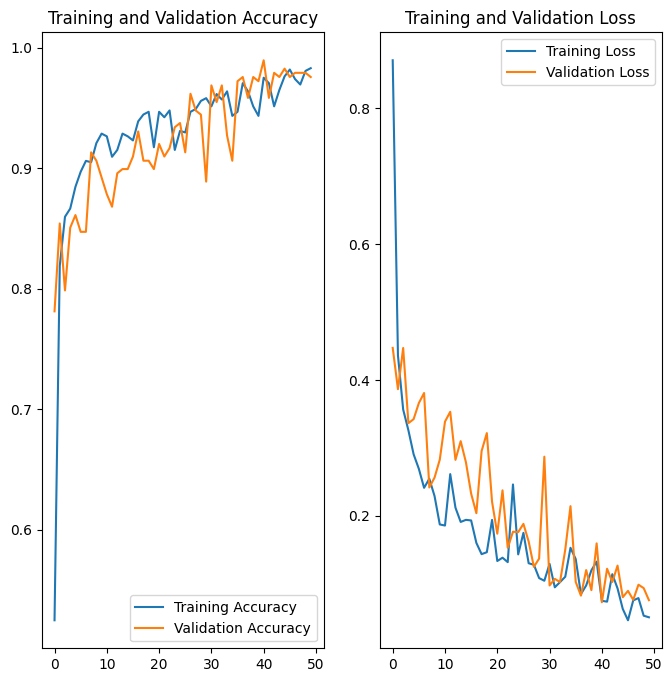

In [13]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
# it will save the model
model.save('final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
